# **PR0301: Lectura de datos de archivos**

## **Objetivo de la Práctica**

Supón que trabajas para una empresa que acaba de fusionar sus operaciones de tres regiones distintas (Norte, Sur y Este). El problema es que cada región gestionaba sus datos de ventas con sistemas diferentes y necesitas un **Dataset Maestro** unificado para el Dashboard de BI.

Las fuentes de datos son:
1. **Región Norte (ventas_norte.csv)**: un sistema legado que exporta archivos de texto separados por punto y coma (**``;``**).
2. **Región Sur (ventas_sur.xlsx)**: el equipo de ventas usa Excel. El archivo contiene **múltiples pestañas** (una por mes).
3. **Región Este (ventas_este.json)**: eatos provenientes de una API moderna. La información del producto y del cliente está **anidada** dentro de diccionarios.

### **Las cosas que tienes que tener en cuenta son:**

1. **Ingesta CSV**: cargar los datos del Norte correctamente.

In [2]:
import pandas as pd

df_norte = pd.read_csv("./ventas_norte.csv", sep=";", parse_dates=["Fecha_Venta"])
print(df_norte.head())

   ID_Transaccion Fecha_Venta Nom_Producto  Cantidad_Vendida  Precio_Unit
0            1000  2023-02-21       Laptop                 4          423
1            1001  2023-01-15       Laptop                 2          171
2            1002  2023-03-13       Laptop                 3           73
3            1003  2023-03-02      Teclado                 1          139
4            1004  2023-01-21      Monitor                 4          692


2. **Ingesta Excel**: leer todas las pestañas del archivo Excel del Sur y combinarlas en un solo DataFrame.

In [3]:
!pip install openpyxl
!pip install xlrd

In [20]:
df_excel = pd.read_excel("ventas_sur.xlsx",sheet_name = None,names=["ID_Transaccion", "Fecha_Venta", "Nom_Producto", "Cantidad_Vendida", "Precio_Unit"])

df_excel

{'Enero':     ID_Transaccion Fecha_Venta Nom_Producto  Cantidad_Vendida  Precio_Unit
 0             2000  2023-03-01      Monitor                 6          624
 1             2001  2023-03-04       Laptop                 7          941
 2             2002  2023-03-26        Mouse                 3          989
 3             2003  2023-02-01       Webcam                 3          621
 4             2004  2023-03-28        Mouse                 5          437
 5             2005  2023-02-02        Mouse                 6          134
 6             2006  2023-03-08       Laptop                 9          636
 7             2007  2023-01-18      Teclado                 5          922
 8             2008  2023-01-25        Mouse                 1          215
 9             2009  2023-02-23      Monitor                 4          845
 10            2010  2023-02-27      Teclado                 5          520
 11            2011  2023-03-08       Webcam                 5          645
 12

In [21]:
df_sur = pd.concat(df_excel.values(),ignore_index=True)
df_sur

,ID_Transaccion,Fecha_Venta,Nom_Producto,Cantidad_Vendida,Precio_Unit
0,2000,2023-03-01,Monitor,6,624
1,2001,2023-03-04,Laptop,7,941
2,2002,2023-03-26,Mouse,3,989
3,2003,2023-02-01,Webcam,3,621
4,2004,2023-03-28,Mouse,5,437
...,...,...,...,...,...
145,2045,2023-03-25,Mouse,5,192
146,2046,2023-03-29,Teclado,9,319
147,2047,2023-03-10,Laptop,1,664
148,2048,2023-02-03,Laptop,5,345


3. **Ingesta JSON (Semi-estructurado)**: cargar los datos del Este. Deberás usar **``pd.json_normalize``** para aplanar la información anidada (desglosar el diccionario de productos en columnas individuales).

In [7]:
import json

with open('ventas_este.json') as f:
    data = json.load(f)

df_json = pd.json_normalize(data)

df_json

,id_orden,timestamp,detalles_producto.nombre,detalles_producto.categoria,detalles_producto.specs.cantidad,detalles_producto.specs.precio,cliente.nombre,cliente.email
0,ORD-3000,2023-03-09 00:00:00,Monitor,Electrónica,2,244,Cliente_0,cliente0@mail.com
1,ORD-3001,2023-01-20 00:00:00,Laptop,Electrónica,2,578,Cliente_1,cliente1@mail.com
2,ORD-3002,2023-01-01 00:00:00,Mouse,Electrónica,2,339,Cliente_2,cliente2@mail.com
3,ORD-3003,2023-02-07 00:00:00,Webcam,Electrónica,2,158,Cliente_3,cliente3@mail.com
4,ORD-3004,2023-03-18 00:00:00,Monitor,Electrónica,1,692,Cliente_4,cliente4@mail.com
...,...,...,...,...,...,...,...,...
95,ORD-3095,2023-03-28 00:00:00,Webcam,Electrónica,1,857,Cliente_95,cliente95@mail.com
96,ORD-3096,2023-01-18 00:00:00,Webcam,Electrónica,2,375,Cliente_96,cliente96@mail.com
97,ORD-3097,2023-02-10 00:00:00,Mouse,Electrónica,1,696,Cliente_97,cliente97@mail.com
98,ORD-3098,2023-01-25 00:00:00,Mouse,Electrónica,2,618,Cliente_98,cliente98@mail.com


In [8]:
df_json2 = df_json[["id_orden","timestamp","detalles_producto.nombre","detalles_producto.specs.cantidad","detalles_producto.specs.precio"]]
df_json2 = df_json2.rename(columns={
    "id_orden":"ID_Transaccion",
    "timestamp":"Fecha_Venta",
    "detalles_producto.nombre":"Nom_Producto",
    "detalles_producto.specs.cantidad":"Cantidad_Vendida",
    "detalles_producto.specs.precio":"Precio_Unit"
                           
})

df_json2

,ID_Transaccion,Fecha_Venta,Nom_Producto,Cantidad_Vendida,Precio_Unit
0,ORD-3000,2023-03-09 00:00:00,Monitor,2,244
1,ORD-3001,2023-01-20 00:00:00,Laptop,2,578
2,ORD-3002,2023-01-01 00:00:00,Mouse,2,339
3,ORD-3003,2023-02-07 00:00:00,Webcam,2,158
4,ORD-3004,2023-03-18 00:00:00,Monitor,1,692
...,...,...,...,...,...
95,ORD-3095,2023-03-28 00:00:00,Webcam,1,857
96,ORD-3096,2023-01-18 00:00:00,Webcam,2,375
97,ORD-3097,2023-02-10 00:00:00,Mouse,1,696
98,ORD-3098,2023-01-25 00:00:00,Mouse,2,618


4. **Transformación y Limpieza**:
- Asegúrate de que las columnas tengan nombres estándar en los tres DataFrames (ej: ``fecha``, ``producto``, ``cantidad``, ``precio_unitario``, ``region``). Esto puedes hacerlo con la función **``rename()``** de Pandas.
- Crea una columna nueva llamada region que indique de dónde viene cada fila (“Norte”, “Sur”, “Este”).

In [13]:
df_norte["Region"] = "norte"
df_norte

,ID_Transaccion,Fecha_Venta,Nom_Producto,Cantidad_Vendida,Precio_Unit,Region
0,1000,2023-02-21,Laptop,4,423,norte
1,1001,2023-01-15,Laptop,2,171,norte
2,1002,2023-03-13,Laptop,3,73,norte
3,1003,2023-03-02,Teclado,1,139,norte
4,1004,2023-01-21,Monitor,4,692,norte
...,...,...,...,...,...,...
95,1095,2023-02-10,Laptop,3,516,norte
96,1096,2023-01-29,Monitor,3,321,norte
97,1097,2023-01-15,Laptop,4,200,norte
98,1098,2023-02-14,Mouse,4,626,norte


In [22]:
df_sur["Region"] = "sur"
df_sur

,ID_Transaccion,Fecha_Venta,Nom_Producto,Cantidad_Vendida,Precio_Unit,Region
0,2000,2023-03-01,Monitor,6,624,sur
1,2001,2023-03-04,Laptop,7,941,sur
2,2002,2023-03-26,Mouse,3,989,sur
3,2003,2023-02-01,Webcam,3,621,sur
4,2004,2023-03-28,Mouse,5,437,sur
...,...,...,...,...,...,...
145,2045,2023-03-25,Mouse,5,192,sur
146,2046,2023-03-29,Teclado,9,319,sur
147,2047,2023-03-10,Laptop,1,664,sur
148,2048,2023-02-03,Laptop,5,345,sur


In [15]:
df_json2["Region"] = "este"
df_json2

,ID_Transaccion,Fecha_Venta,Nom_Producto,Cantidad_Vendida,Precio_Unit,Region
0,ORD-3000,2023-03-09 00:00:00,Monitor,2,244,este
1,ORD-3001,2023-01-20 00:00:00,Laptop,2,578,este
2,ORD-3002,2023-01-01 00:00:00,Mouse,2,339,este
3,ORD-3003,2023-02-07 00:00:00,Webcam,2,158,este
4,ORD-3004,2023-03-18 00:00:00,Monitor,1,692,este
...,...,...,...,...,...,...
95,ORD-3095,2023-03-28 00:00:00,Webcam,1,857,este
96,ORD-3096,2023-01-18 00:00:00,Webcam,2,375,este
97,ORD-3097,2023-02-10 00:00:00,Mouse,1,696,este
98,ORD-3098,2023-01-25 00:00:00,Mouse,2,618,este


5. **Consolidación**: concatena los tres DataFrames en uno solo (``df_total``). Recuerda que puedes concatenar varios dataframes de Pandas con la función **``concat()``**

In [24]:
df_total = pd.concat([df_norte,df_sur,df_json2])
df_total

,ID_Transaccion,Fecha_Venta,Nom_Producto,Cantidad_Vendida,Precio_Unit,Region
0,1000,2023-02-21 00:00:00,Laptop,4,423,norte
1,1001,2023-01-15 00:00:00,Laptop,2,171,norte
2,1002,2023-03-13 00:00:00,Laptop,3,73,norte
3,1003,2023-03-02 00:00:00,Teclado,1,139,norte
4,1004,2023-01-21 00:00:00,Monitor,4,692,norte
...,...,...,...,...,...,...
95,ORD-3095,2023-03-28 00:00:00,Webcam,1,857,este
96,ORD-3096,2023-01-18 00:00:00,Webcam,2,375,este
97,ORD-3097,2023-02-10 00:00:00,Mouse,1,696,este
98,ORD-3098,2023-01-25 00:00:00,Mouse,2,618,este


**Exportación Estandarizada**: guarda el resultado final en un archivo **CSV** llamado ``ventas_consolidadas.csv``. Para ello tienes la función **``to_csv()``** de Pandas. El archivo resultante debe usar coma (``,``) como separador, codificación ``utf-8`` y **no debe incluir el índice** numérico del DataFrame (parámetro ``index=False``).

In [25]:
df_total.to_csv(
    "ventas_consolidadas.csv",
    sep=",",
    encoding="utf-8",
    index=False
)

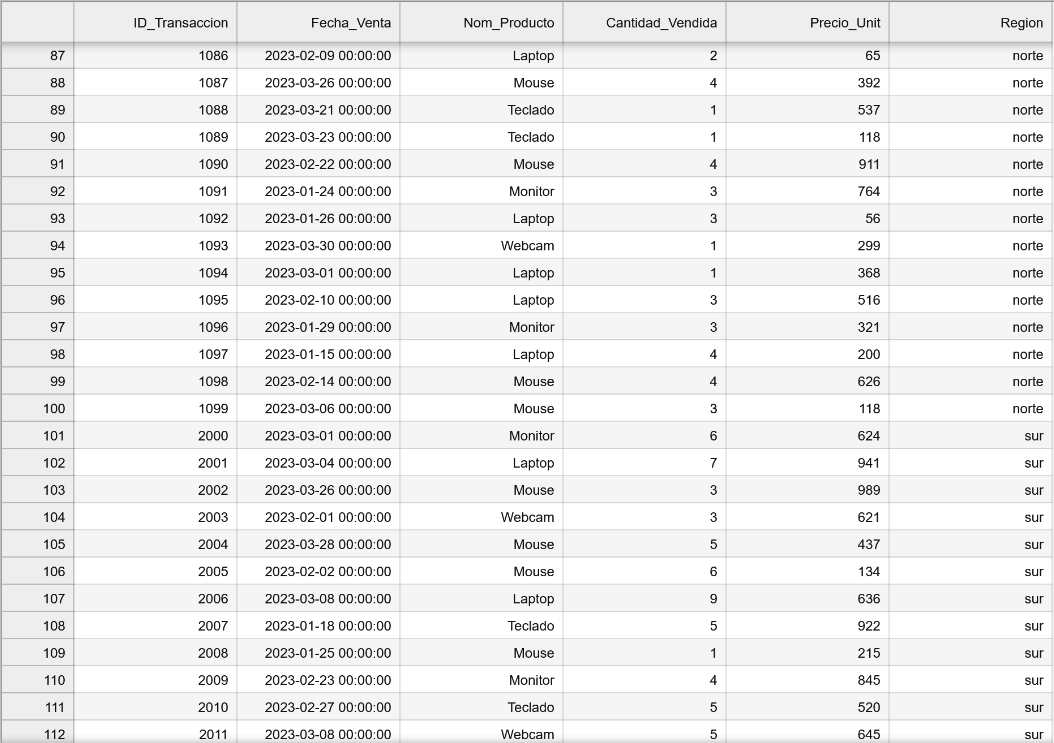

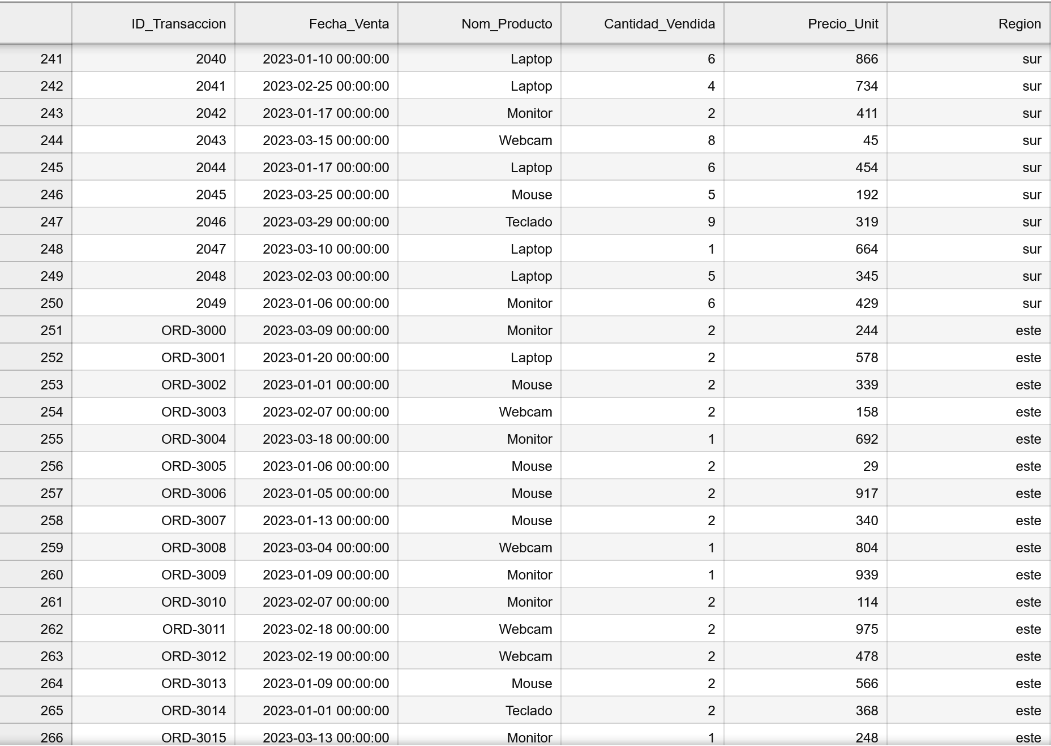